# Zadanie 7.10
## Animacja kota Arnolda
### 1. Wczytuję obrazek:

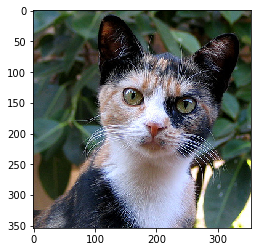

In [12]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
b = mpimg.imread('catmap.jpg')
plt.imshow(b)
plt.show()

### 2. Wykonuję kolejne iteracje i szukam cyklu:
(na moim laptopie ok. 5 minut dla obrazka $354\times354$)

In [13]:
%%time
import numpy as np

def calculate(max_step_count):
    A = np.matrix([[2,1],[1,1]])
    steps = np.zeros([max_step_count,len(b),len(b[0]),len(b[0][0])],'uint8')
    steps[0]= b
    
    max_reached_step = max_step_count
    for i in range(1,max_step_count):
        for x in range(len(b)):
            for y in range(len(b)):
                steps[i, x, y, :] = steps[i-1, (A[0,0]*x+A[0,1]*y) % len(b),(A[1,0]*x+A[1,1]*y) % len(b), :]
        if np.all(steps[i]==steps[0]):
            max_reached_step = i
            print 'cycle! %d steps' % i
            break
    return steps[:max_reached_step]

steps = calculate(3000)

cycle! 348 steps
Wall time: 4min 50s


### 3. Generuję animację:
(wymaga kodeków *ffmpeg*)

In [14]:
from matplotlib import animation, rcParams, rc
from IPython.display import HTML    

fig, ax = plt.subplots()

im = plt.imshow(steps[0])
def updatefig(s):
    im.set_array(steps[s])
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)

rc('animation', writer='ffmpeg')
rc('animation', html='html5')

HTML(ani.to_html5_video())
